In [1]:
#Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing
%matplotlib inline
sns.set_style('whitegrid')
PATH='~/Downloads/Upgrad/ML-1/Linear Regression Module/Linear Regression Assignment/Data Files/'
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Step 1. Reading and Understanding the Data

In [2]:
#Loading our dataset
carprice=pd.read_csv(PATH+'CarPrice_Assignment.csv')


In [3]:
carprice.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
carprice.shape

(205, 26)

In [5]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
carDictionary=pd.read_excel(PATH+'Data Dictionary - carprices.xlsx')

In [7]:
pd.set_option('display.max_colwidth', -1)
carDictionary

,Variable,Desc
0,Car_ID,Unique id of each observation (Interger)
1,Symboling,"Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)"
2,carCompany,Name of car company (Categorical)
3,fueltype,Car fuel type i.e gas or diesel (Categorical)
4,aspiration,Aspiration used in a car (Categorical)
5,doornumber,Number of doors in a car (Categorical)
6,carbody,body of car (Categorical)
7,drivewheel,type of drive wheel (Categorical)
8,enginelocation,Location of car engine (Categorical)
9,wheelbase,Weelbase of car (Numeric)


In [8]:
#Checking if there is any missing data in the dataset
carprice.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [10]:
# get some basic ideas about the data
def summarize_data(df):
    for column in df.columns:
        print (column)
        if df.dtypes[column] == np.object: # Categorical data
            print (df[column].value_counts())
        else:
            print (df[column].describe() )
            
        print ('\n')
    
summarize_data(carprice)

car_ID
count    205.000000
mean     103.000000
std      59.322565 
min      1.000000  
25%      52.000000 
50%      103.000000
75%      154.000000
max      205.000000
Name: car_ID, dtype: float64


symboling
count    205.000000
mean     0.834146  
std      1.245307  
min     -2.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      3.000000  
Name: symboling, dtype: float64


CarName
peugeot 504         6
toyota corona       6
toyota corolla      6
subaru dl           4
mazda 626           3
                   ..
audi 4000           1
nissan fuga         1
buick skyhawk       1
chevrolet impala    1
nissan leaf         1
Name: CarName, Length: 147, dtype: int64


fueltype
gas       185
diesel    20 
Name: fueltype, dtype: int64


aspiration
std      168
turbo    37 
Name: aspiration, dtype: int64


doornumber
four    115
two     90 
Name: doornumber, dtype: int64


carbody
sedan          96
hatchback      70
wagon          25
hardtop        8 
convertible    6 
N

# Step 2: Cleaning and Visualizing the data

In [11]:
#Creating a new variable company from CarName and doing some spelling corrections

carprice['Company']=carprice['CarName'].apply(lambda x: x.lower().split(' ')[0])
carprice['Company']=carprice['Company'].replace({'maxda':'mazda', 'toyouta': 'toyota', 'vokswagen':'volkswagen','vw':'volkswagen','porcshce':'porsche'})

In [12]:
#Dropping CarID and CarName fields

carprice.drop('car_ID',axis=1,inplace=True)
carprice.drop('CarName',axis=1,inplace=True)


## UNIVARIATE ANANALYSIS

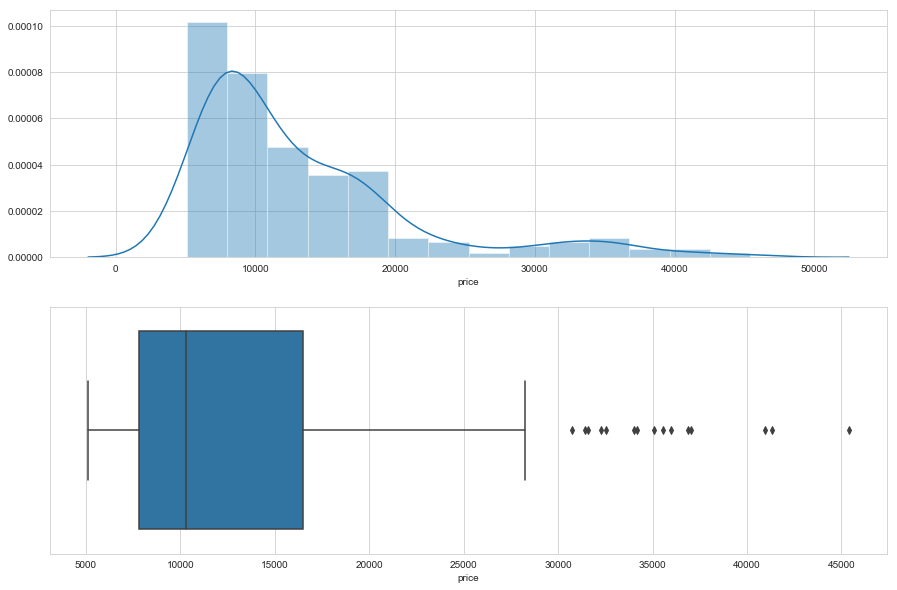

In [13]:
#Plotting our target variable 'price'
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.distplot(carprice['price'])
plt.subplot(2,1,2)
sns.boxplot(carprice['price'])

Price of the car ranges around 5k-45k with Median around 10k

### Visualize the categorical variables: 
1. Symboling 
2. fueltype
2. aspiration
3. doornumber
4. carbody
5. drivewheel
6. enginelocation
7. enginetype
8. cylindernumber
9. fuelsystem
10. Company

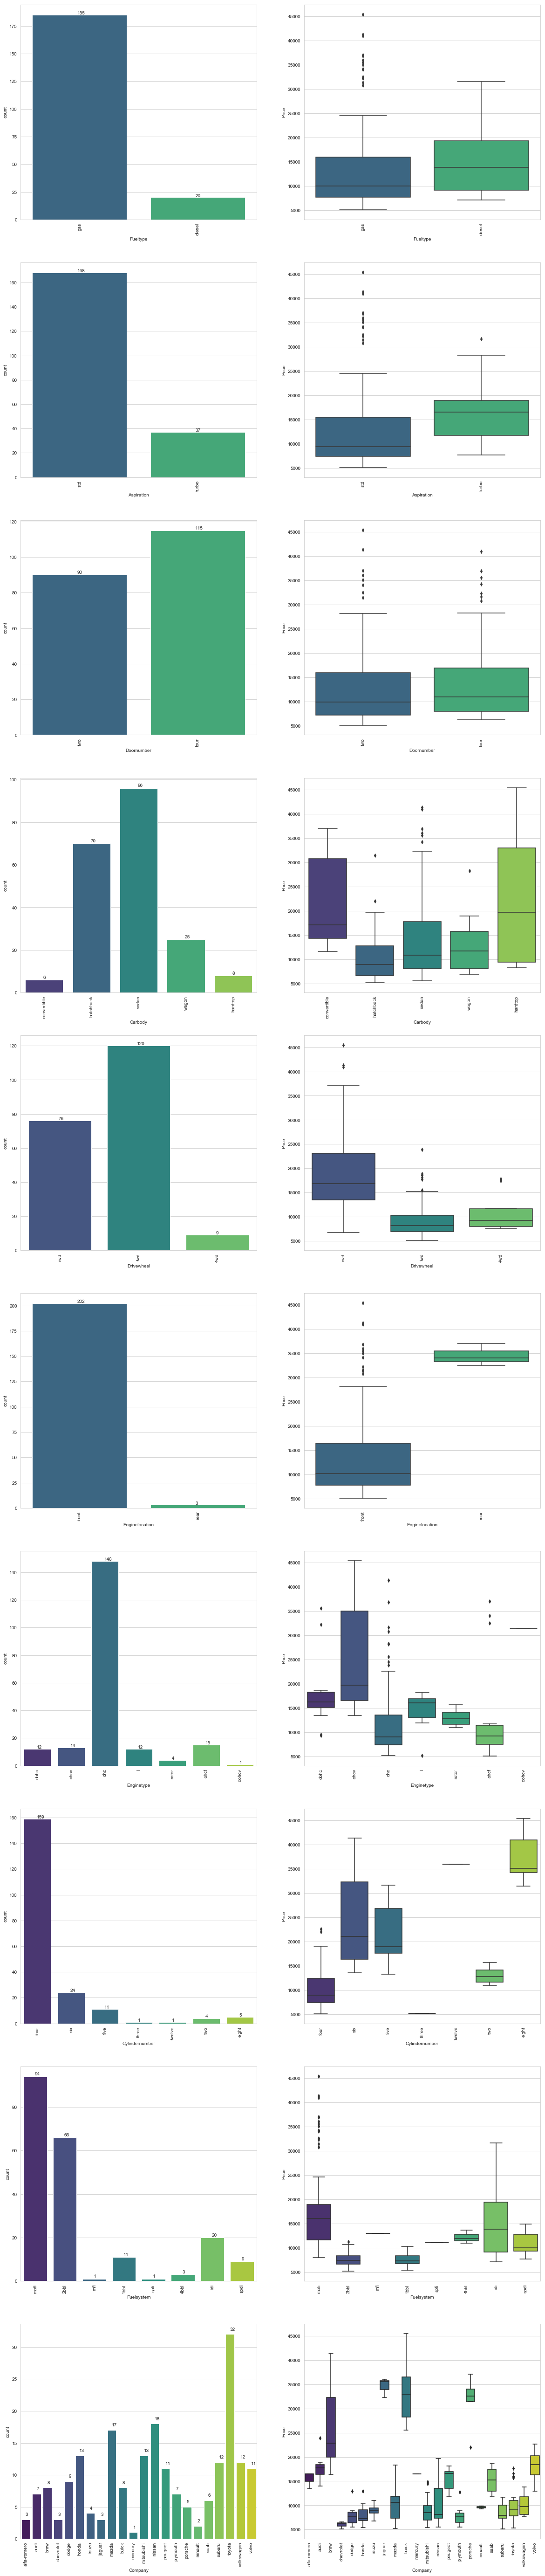

In [14]:
#Plotting categorical variables using Countplot and Boxplot
plt.figure(figsize=(20,100))
i=1
for col in carprice:
    if(carprice[col].dtypes==object):
        plt.subplot(10,2,i)
        ax=sns.countplot(carprice[col],palette='viridis')
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.annotate('{:}'.format(height), (x+width/2-0.02, y + height+0.6))
        plt.xticks(rotation=90)
        plt.xlabel(col.capitalize())
        
        plt.subplot(10,2,i+1)
        sns.boxplot(carprice[col],carprice['price'],palette='viridis')
        plt.xticks(rotation=90)
        plt.xlabel(col.capitalize())
        plt.ylabel('Price')
        i+=2

# Step 3: Data Preparation

In [15]:
#Converting Cylindernumber and door number to integer

carprice['cylindernumber']=carprice['cylindernumber'].replace({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})
carprice['doornumber']=carprice['doornumber'].replace({'two':2,'four':4})

### Checking the Correlation
We will not label encode the categorical variables and check the correlation between the variables

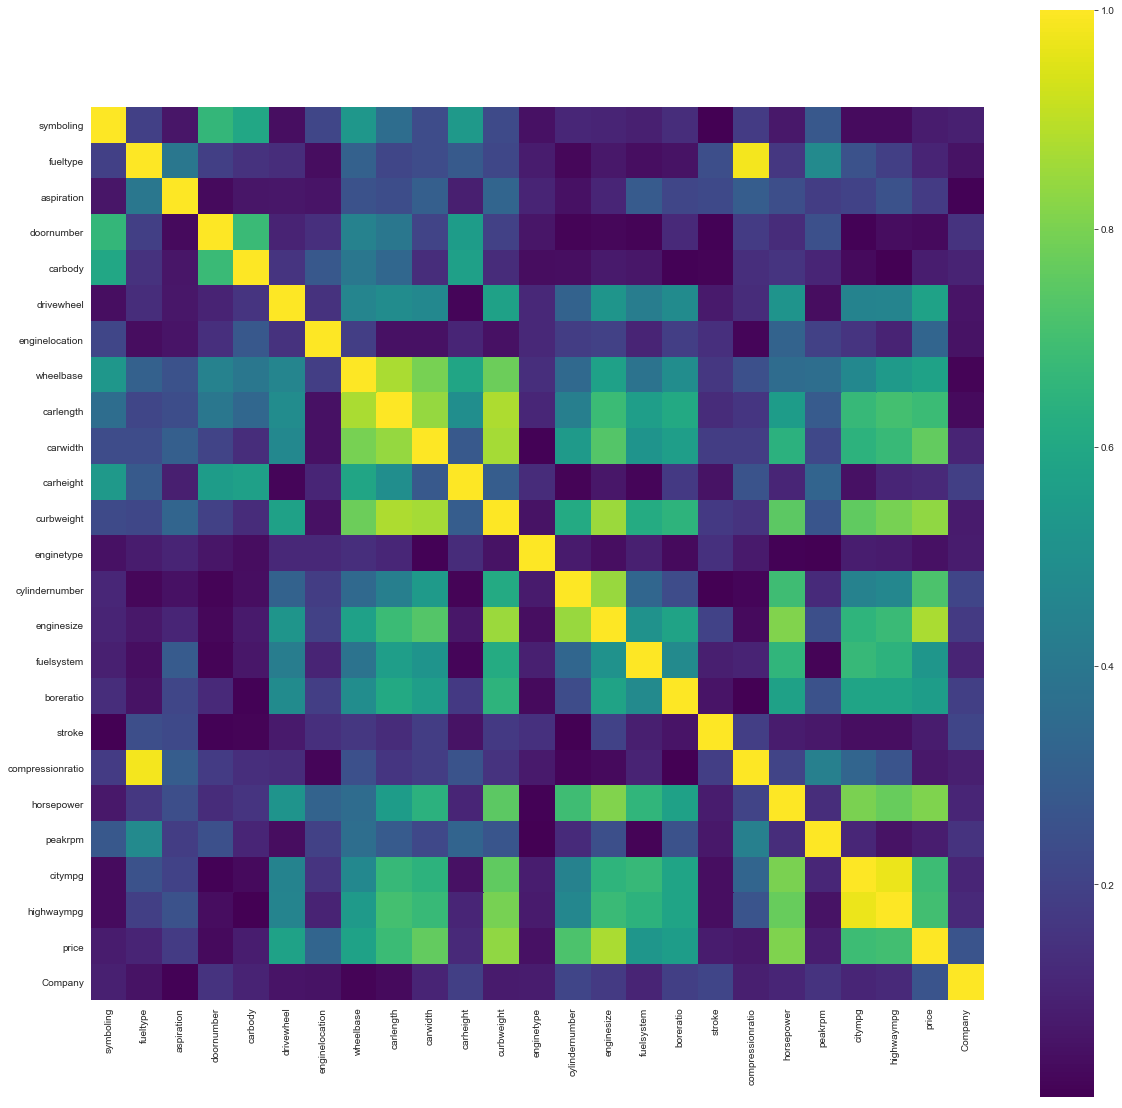

In [16]:
# Encode the categorical features as numbers to check correlation
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result


# Calculate the correlation and plot it
encoded_data= number_encode_features(carprice)
plt.figure(figsize=(20,20))
sns.heatmap(abs(encoded_data.corr()), square=True,cmap='viridis')


We can see that there is a high correlation between fueltype and compression ratio, and , highwaympg and citympg. Lets check on this further.

    fueltype  compressionratio
0    gas      9.0             
1    gas      9.0             
2    gas      9.0             
3    gas      10.0            
4    gas      8.0             
..   ...      ...             
200  gas      9.5             
201  gas      8.7             
202  gas      8.8             
203  diesel   23.0            
204  gas      9.5             

[205 rows x 2 columns]


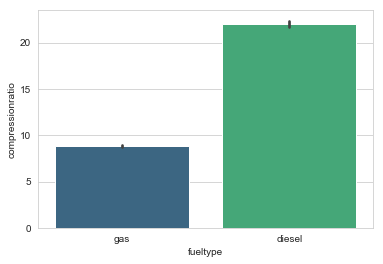

In [17]:
#Lets first analyse fueltype and compression ratio

print(carprice[["fueltype", "compressionratio"]])
sns.barplot("fueltype", "compressionratio",data=carprice,palette='viridis')

We can see the difference in the compression ratio between gas and diesel and clearly see why the columns have high correlation, we will drop compression ratio in our further analysis.

In [18]:
#Dropping compressionratio
carprice.drop('compressionratio',axis=1,inplace=True)

     citympg  highwaympg
0    21       27        
1    21       27        
2    19       26        
3    24       30        
4    18       22        
..   ..       ..        
200  23       28        
201  19       25        
202  18       23        
203  26       27        
204  19       25        

[205 rows x 2 columns]


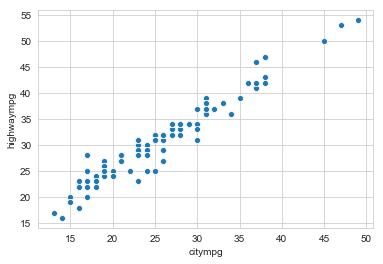

In [19]:
# Lets take a look at citympg and highwaympg variables
print(carprice[["citympg", "highwaympg"]])
sns.scatterplot("citympg", "highwaympg",data=carprice)

In [20]:
#Dropping citympg as it is highly corelated with highwaympg
carprice.drop('citympg',axis=1,inplace=True)

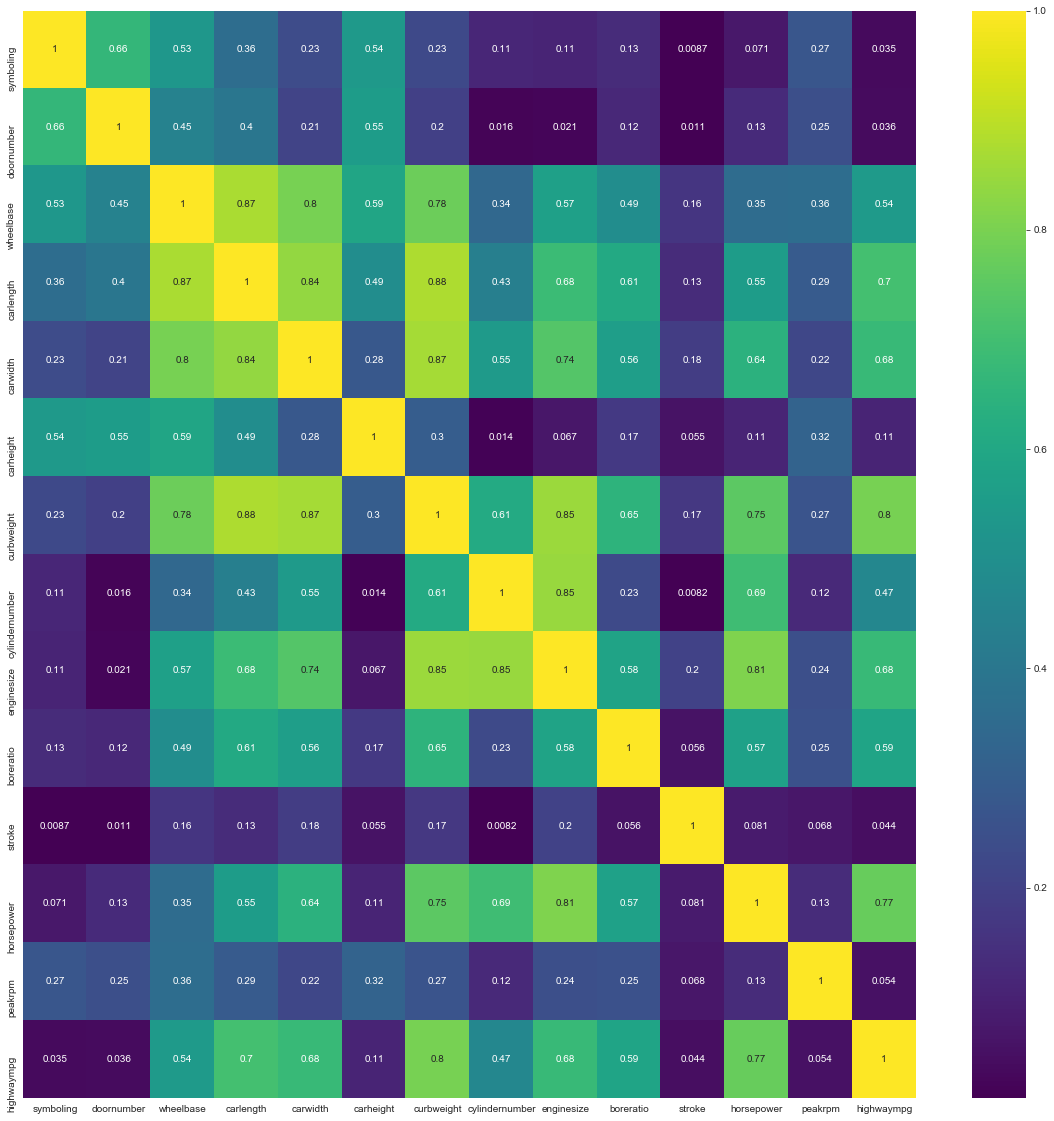

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(carprice.drop('price', axis=1).corr()),annot=True,cmap='viridis')
#Min Max Scaling of numerical columns in X_train


### Creating the dummy variables for categories

In [22]:
#Creating dummy variables for categories 

varlist=['fueltype','aspiration','carbody','drivewheel','fuelsystem','enginetype','Company','doornumber'
         ,'enginelocation']

#Label Encoder- Symboling, doornumber, cylindernumber
carprice=pd.get_dummies(carprice,columns=varlist,prefix_sep='_',drop_first=True)


In [23]:
carprice.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo,doornumber_4,enginelocation_rear
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,...,0,0,0,0,0,0,0,0,1,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,...,0,0,0,0,0,0,0,0,1,0


# Step 4: Splitting the data into train and test

In [24]:
#Splitting the data into X_train and X_test

from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(carprice, test_size=0.3, random_state=100)

In [25]:
#Checking the shape of X_train and X_test 

print(X_train.shape)
print(X_test.shape)

(143, 58)
(62, 58)


### Min Max scaling for our continuous variables

In [26]:
#Min Max Scaling of numerical columns in X_train

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

mm_scaler_list=['wheelbase','carwidth','carheight','boreratio','stroke','horsepower','peakrpm',
         'highwaympg','symboling','cylindernumber','price']

X_train[mm_scaler_list]=scaler.fit_transform(X_train[mm_scaler_list])


### Separating the data into independent and predictor variables

In [27]:
#Dividing X_test into X_test(independent variables) and y(dependent variable price)

y_train=X_train.pop('price')
X_train=X_train

In [28]:
#importing  LinearRegression from SKLearn and creating an object and fitting the model with all variables

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Using RFE to select the top 15 significant features

In [29]:
#Feature selection using RFE selecting the top 15 variables

from sklearn.feature_selection import RFE
rfe=RFE(lm,15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [30]:
rfe.support_

array([False,  True, False,  True, False, False,  True, False, False,
       False,  True, False,  True, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True])

In [31]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 27),
 ('wheelbase', True, 1),
 ('carlength', False, 39),
 ('carwidth', True, 1),
 ('carheight', False, 6),
 ('curbweight', False, 40),
 ('cylindernumber', True, 1),
 ('enginesize', False, 31),
 ('boreratio', False, 19),
 ('stroke', False, 4),
 ('horsepower', True, 1),
 ('peakrpm', False, 17),
 ('highwaympg', True, 1),
 ('fueltype_gas', False, 22),
 ('aspiration_turbo', False, 11),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 8),
 ('drivewheel_rwd', False, 18),
 ('fuelsystem_2bbl', False, 13),
 ('fuelsystem_4bbl', False, 9),
 ('fuelsystem_idi', False, 34),
 ('fuelsystem_mfi', False, 42),
 ('fuelsystem_mpfi', False, 37),
 ('fuelsystem_spdi', False, 38),
 ('fuelsystem_spfi', False, 41),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 3),
 ('enginetype_ohc', False, 20),
 ('enginetype_ohcf', False, 30),
 ('enginetype_ohcv', False, 29),
 ('enginetype_rotor', 

In [32]:
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,wheelbase,carwidth,cylindernumber,horsepower,highwaympg,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_rotor,Company_bmw,Company_buick,Company_porsche,enginelocation_rear
122,0.244828,0.291667,0.2,0.083333,0.567568,0,0,1,0,0,0,0,0,0,0
125,0.272414,0.666667,0.2,0.395833,0.270270,0,1,0,0,0,0,0,0,1,0
166,0.272414,0.308333,0.2,0.266667,0.324324,0,1,0,0,0,0,0,0,0,0
1,0.068966,0.316667,0.2,0.262500,0.270270,0,0,0,0,0,0,0,0,0,0
199,0.610345,0.575000,0.2,0.475000,0.135135,0,0,0,1,0,0,0,0,0,0


# Step 5 : Building our model

In [35]:
#Creating our first model with 15 variables from RFE
# X=X_train_rfe.drop('const')
X_train_rfe=sm.add_constant(X_train_rfe)
lr1=sm.OLS(y_train,X_train_rfe).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     96.62
Date:                Sun, 31 May 2020   Prob (F-statistic):           8.21e-62
Time:                        01:15:10   Log-Likelihood:                 197.03
No. Observations:                 143   AIC:                            -362.1
Df Residuals:                     127   BIC:                            -314.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1061      0.049     -2.145      0.034      -0.204      -0.008
wheelbase               0.2632      0.060      4.375      0.000       0.144       0.382
carwidth                0.2579      0.080      3.237      0.002       0.100       0.416
cylindernumber          0.2280      0.089      2.576      0.011       0.053       0.403
horsepower              0.6180      0.092      6.729      0.000       0.436       0.800
highwaympg              0.1634      0.061      2.667      0.009       0.042       0.285
carbody_hardtop        -0.1865      0.059     -3.147      0.002      -0.304      -0.069
carbody_hatchback      -0.1996      0.038     -5.276      0.000      -0.274      -0.125
carbody_sedan          -0.1779      0.039     -4.599      0.000      -0.254      -0.101
carbody_wagon          -0.1932      0.041     -4.755      0.000      -0.274      -0.113
enginetype_dohcv       -0.3312      0.101     -3.278      0.001      -0.531      -0.131
enginetype_rotor        0.1440      0.042      3.419      0.001       0.061       0.227
Company_bmw             0.2429      0.030      8.165      0.000       0.184       0.302
Company_buick           0.1834      0.036      5.037      0.000       0.111       0.255
Company_porsche         0.1944      0.070      2.797      0.006       0.057       0.332
enginelocation_rear     0.2334      0.107      2.187      0.031       0.022       0.445
==============================================================================
Omnibus:                       39.835   Durbin-Watson:                   2.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.313
Skew:                           1.060   Prob(JB):                     2.48e-25
Kurtosis:                       6.811   Cond. No.                         37.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have got a low P(F-stats), so we have got a good model. Also, the adjust R-squared is 0.91 which is good as well. The P-value is less than 0.05 for all our variables which is ideal. Lets find the VIF now to avoid any multicollinearity issue.

In [39]:
X=X_train_rfe.drop('const',axis=1)

In [41]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,47.90
0,wheelbase,25.81
3,horsepower,21.08
7,carbody_sedan,19.33
2,cylindernumber,18.85
4,highwaympg,14.06
6,carbody_hatchback,12.97
8,carbody_wagon,5.45
13,Company_porsche,3.44
14,enginelocation_rear,2.72


We can see that carbody_sedan has a high VIF, lets remove the variable and check our model.

In [42]:
#Creating our second model after dropping carbody_sedan as it has high VIF value
X_train_rfe.drop('carwidth', axis=1,inplace=True)
lr2=sm.OLS(y_train,X_train_rfe).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     95.69
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.21e-60
Time:                        01:17:07   Log-Likelihood:                 191.36
No. Observations:                 143   AIC:                            -352.7
Df Residuals:                     128   BIC:                            -308.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0543      0.048     -1.120      0.265      -0.150       0.042
wheelbase               0.4061      0.042      9.591      0.000       0.322       0.490
cylindernumber          0.2484      0.092      2.714      0.008       0.067       0.429
horsepower              0.7095      0.091      7.834      0.000       0.530       0.889
highwaympg              0.1500      0.063      2.368      0.019       0.025       0.275
carbody_hardtop        -0.2088      0.061     -3.423      0.001      -0.329      -0.088
carbody_hatchback      -0.2130      0.039     -5.468      0.000      -0.290      -0.136
carbody_sedan          -0.1895      0.040     -4.746      0.000      -0.268      -0.110
carbody_wagon          -0.2149      0.042     -5.174      0.000      -0.297      -0.133
enginetype_dohcv       -0.3275      0.105     -3.128      0.002      -0.535      -0.120
enginetype_rotor        0.1576      0.043      3.629      0.000       0.072       0.244
Company_bmw             0.2182      0.030      7.321      0.000       0.159       0.277
Company_buick           0.2174      0.036      6.017      0.000       0.146       0.289
Company_porsche         0.2525      0.070      3.627      0.000       0.115       0.390
enginelocation_rear     0.1668      0.109      1.537      0.127      -0.048       0.382
==============================================================================
Omnibus:                       24.014   Durbin-Watson:                   2.236
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.033
Skew:                           0.644   Prob(JB):                     9.20e-14
Kurtosis:                       5.901   Cond. No.                         34.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After removing the carbody_sedan, the model P(F-stat) is still very low. The adjusted R-square is 0.89 which is still a good number for the model. But certain variables including carbody_hardtop, carbody_wagon, highwaympg, enginelocation_rear have become significant. Lets remove the variable 'carbody_hardtop' and build our model again.

In [43]:
#Creating our third model after dropping carbody_hardtop as it has high P value

X_train_rfe.drop('enginelocation_rear', axis=1,inplace=True)
lr3=sm.OLS(y_train,X_train_rfe).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.8
Date:                Sun, 31 May 2020   Prob (F-statistic):           3.73e-61
Time:                        01:17:25   Log-Likelihood:                 190.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     129   BIC:                            -310.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0602      0.049     -1.240      0.217      -0.156       0.036
wheelbase             0.3999      0.042      9.438      0.000       0.316       0.484
cylindernumber        0.2548      0.092      2.773      0.006       0.073       0.437
horsepower            0.7223      0.091      7.967      0.000       0.543       0.902
highwaympg            0.1561      0.064      2.456      0.015       0.030       0.282
carbody_hardtop      -0.1751      0.057     -3.061      0.003      -0.288      -0.062
carbody_hatchback    -0.2133      0.039     -5.446      0.000      -0.291      -0.136
carbody_sedan        -0.1873      0.040     -4.670      0.000      -0.267      -0.108
carbody_wagon        -0.2119      0.042     -5.081      0.000      -0.294      -0.129
enginetype_dohcv     -0.4008      0.094     -4.279      0.000      -0.586      -0.216
enginetype_rotor      0.1615      0.044      3.703      0.000       0.075       0.248
Company_bmw           0.2171      0.030      7.248      0.000       0.158       0.276
Company_buick         0.2182      0.036      6.007      0.000       0.146       0.290
Company_porsche       0.3161      0.056      5.621      0.000       0.205       0.427
==============================================================================
Omnibus:                       22.200   Durbin-Watson:                   2.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.786
Skew:                           0.615   Prob(JB):                     5.69e-12
Kurtosis:                       5.679   Cond. No.                         30.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our R-square has not dropped much but we still have some variables with high P value,which means that some variables are still pretty significant. We will drop carbody_wagon and build our model the fourth time.

In [44]:
# Calculate the VIFs again for the new model
X=X_train_rfe.drop('const',axis=1)
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,carbody_sedan,19.25
1,cylindernumber,18.60
2,horsepower,17.06
3,highwaympg,13.63
5,carbody_hatchback,12.91
0,wheelbase,11.30
7,carbody_wagon,5.45
12,Company_porsche,2.08
4,carbody_hardtop,1.97
8,enginetype_dohcv,1.78


In [45]:
#Creating our fourth model after dropping carbody_wagon as it has high VIF

X_train_rfe.drop('carbody_sedan', axis=1,inplace=True)
lr4=sm.OLS(y_train,X_train_rfe).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     93.49
Date:                Sun, 31 May 2020   Prob (F-statistic):           8.18e-58
Time:                        01:18:37   Log-Likelihood:                 178.89
No. Observations:                 143   AIC:                            -331.8
Df Residuals:                     130   BIC:                            -293.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1616      0.047     -3.451      0.001      -0.254      -0.069
wheelbase             0.3096      0.041      7.624      0.000       0.229       0.390
cylindernumber        0.2508      0.099      2.534      0.012       0.055       0.447
horsepower            0.7007      0.098      7.185      0.000       0.508       0.894
highwaympg            0.0744      0.066      1.130      0.261      -0.056       0.205
carbody_hardtop      -0.0043      0.047     -0.091      0.928      -0.098       0.089
carbody_hatchback    -0.0427      0.015     -2.808      0.006      -0.073      -0.013
carbody_wagon        -0.0363      0.019     -1.868      0.064      -0.075       0.002
enginetype_dohcv     -0.3650      0.101     -3.630      0.000      -0.564      -0.166
enginetype_rotor      0.1381      0.047      2.960      0.004       0.046       0.230
Company_bmw           0.2116      0.032      6.563      0.000       0.148       0.275
Company_buick         0.2646      0.038      7.034      0.000       0.190       0.339
Company_porsche       0.2961      0.060      4.902      0.000       0.177       0.416
==============================================================================
Omnibus:                       25.102   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.077
Skew:                           0.815   Prob(JB):                     1.63e-10
Kurtosis:                       5.215   Cond. No.                         28.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our R-square has not dropped after dropping 'carbody_wagon' but we still have some variables with high P value. We will drop highwaympg and build our model the fourth time.

In [47]:
#Creating our fifth model after dropping highwaympg as it has high P-value

X_train_rfe.drop('highwaympg', axis=1,inplace=True)
lr5=sm.OLS(y_train,X_train_rfe).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     112.7
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.36e-59
Time:                        01:19:15   Log-Likelihood:                 178.19
No. Observations:                 143   AIC:                            -334.4
Df Residuals:                     132   BIC:                            -301.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1156      0.023     -5.068      0.000      -0.161      -0.070
wheelbase             0.2960      0.038      7.709      0.000       0.220       0.372
cylindernumber        0.2715      0.097      2.801      0.006       0.080       0.463
horsepower            0.6238      0.069      8.981      0.000       0.486       0.761
carbody_hatchback    -0.0411      0.015     -2.771      0.006      -0.070      -0.012
carbody_wagon        -0.0403      0.019     -2.123      0.036      -0.078      -0.003
enginetype_dohcv     -0.3266      0.092     -3.562      0.001      -0.508      -0.145
enginetype_rotor      0.1264      0.045      2.786      0.006       0.037       0.216
Company_bmw           0.2115      0.032      6.586      0.000       0.148       0.275
Company_buick         0.2601      0.037      6.972      0.000       0.186       0.334
Company_porsche       0.3023      0.056      5.367      0.000       0.191       0.414
==============================================================================
Omnibus:                       26.291   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.716
Skew:                           0.848   Prob(JB):                     4.35e-11
Kurtosis:                       5.265   Cond. No.                         23.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our R-square is still pretty much the same after dropping 'highway_mpg'. The p-value for all variables is less than 0.05, which means all the variables are significant now. Lets check the VIF to check for multicollinearity.

In [51]:
# Calculate the VIFs again for the new model
X=X_train_rfe.drop('const',axis=1)
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,4.73
0,wheelbase,4.45
7,Company_porsche,1.73
4,enginetype_dohcv,1.55
2,carbody_hatchback,1.37
3,carbody_wagon,1.26
6,Company_buick,1.16
5,Company_bmw,1.15


We can see that the VIF of carwidth is 6.95 which is pretty significant, we will drop this variable and build out model again.

In [50]:
#Creating our sixth model after dropping carwidth as it has high VIF

X_train_rfe.drop('enginetype_rotor', axis=1,inplace=True)
lr6=sm.OLS(y_train,X_train_rfe).fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     131.6
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.29e-59
Time:                        01:20:01   Log-Likelihood:                 172.92
No. Observations:                 143   AIC:                            -327.8
Df Residuals:                     134   BIC:                            -301.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0754      0.018     -4.144      0.000      -0.111      -0.039
wheelbase             0.2824      0.039      7.186      0.000       0.205       0.360
horsepower            0.7708      0.049     15.686      0.000       0.674       0.868
carbody_hatchback    -0.0403      0.015     -2.709      0.008      -0.070      -0.011
carbody_wagon        -0.0434      0.020     -2.227      0.028      -0.082      -0.005
enginetype_dohcv     -0.3118      0.094     -3.314      0.001      -0.498      -0.126
Company_bmw           0.2236      0.033      6.834      0.000       0.159       0.288
Company_buick         0.2916      0.037      7.963      0.000       0.219       0.364
Company_porsche       0.2679      0.057      4.710      0.000       0.155       0.380
==============================================================================
Omnibus:                       18.111   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.857
Skew:                           0.731   Prob(JB):                     6.60e-06
Kurtosis:                       4.367   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dropping the carwidth has decrease the significance of some variable as they have high P-value. We will drop enginelocation_rear and build our model again.

In [52]:
#Creating our seventh model after dropping horsepower as it has high P value

X_train_rfe.drop('enginelocation_rear', axis=1,inplace=True)
lr7=sm.OLS(y_train,X_train_rfe).fit()
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     121.5
Date:                Wed, 27 May 2020   Prob (F-statistic):           1.08e-59
Time:                        11:48:35   Log-Likelihood:                 175.79
No. Observations:                 143   AIC:                            -331.6
Df Residuals:                     133   BIC:                            -301.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1241      0.023     -5.453      0.000      -0.169      -0.079
wheelbase             0.2870      0.039      7.423      0.000       0.211       0.363
cylindernumber        0.2845      0.098      2.903      0.004       0.091       0.478
horsepower            0.6266      0.070      8.907      0.000       0.487       0.766
carbody_hatchback    -0.0333      0.015     -2.290      0.024      -0.062      -0.005
enginetype_dohcv     -0.3337      0.093     -3.595      0.000      -0.517      -0.150
enginetype_rotor      0.1291      0.046      2.810      0.006       0.038       0.220
Company_bmw           0.2194      0.032      6.790      0.000       0.155       0.283
Company_buick         0.2612      0.038      6.911      0.000       0.186       0.336
Company_porsche       0.3032      0.057      5.313      0.000       0.190       0.416
==============================================================================
Omnibus:                       29.132   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.758
Skew:                           0.913   Prob(JB):                     7.80e-13
Kurtosis:                       5.454   Cond. No.                         23.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have got a pretty good F stats and adjusted R-square. All the variables are also significant now. Lets check the VIF for multicollinearity.

In [53]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,13.75
3,horsepower,3.57
2,cylindernumber,3.40
9,Company_porsche,1.78
1,wheelbase,1.67
5,enginetype_dohcv,1.59
6,enginetype_rotor,1.52
8,Company_buick,1.28
4,carbody_hatchback,1.27
7,Company_bmw,1.11


The VIF is now less than 5 for all our variables which means we have a good model now. We will predict the values for the y_train and do the residual analysis now.

## Residual Analysis

In [54]:
#Finding the predicted y_train for our model

y_train_predict=lr7.predict(X_train_rfe)

In [52]:
#Finding the predicted y_train for our model

y_train_predict=lr6.predict(X_train_rfe)

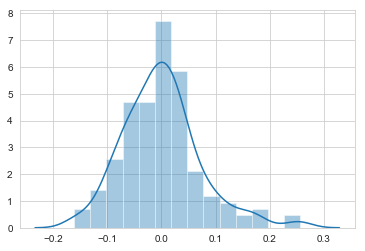

In [53]:
#Residual analysis
sns.distplot(y_train-y_train_predict)

THe graph seems to follow a normal distribution around 0. Our assumption that the error term is normally ditributed around 0 is valid for our model. We will now validate if our error is random or not.

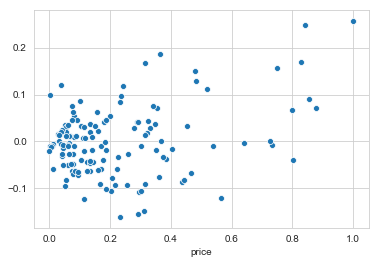

In [54]:
sns.scatterplot(y_train,y_train-y_train_predict)

Our error term are pretty random. So this proved our assumptions for linear regression regarding the error terms. <br>
Next, we will predict the values on our unseen data X_test.

# Step 6: Making predictions to the test set using our model

In [55]:
#Copying X_test to a new variable X_test_rfe
X_test_rfe=X_test.copy()

### Scaling our Test set

In [56]:
#Min Max Scaling of numerical columns in X_test_rfe

X_test_rfe[mm_scaler_list]=scaler.transform(X_test_rfe[mm_scaler_list])

### Splitting our Test set into Independent and Predictor variable

In [57]:
#Transforming X_test for model prediction and creating y_test

varlist=list(X_train_rfe.columns[1:,])
y_test_rfe=X_test_rfe.pop('price')
X_test_rfe=X_test_rfe[varlist]


In [58]:
#Adding constant to our test set and making the predictions.
X_test_rfe=sm.add_constant(X_test_rfe)

y_test_predict=lr6.predict(X_test_rfe)

Text(0, 0.5, 'y_pred')

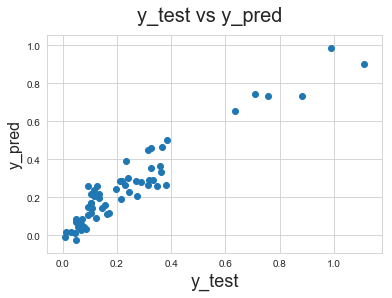

In [59]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test_rfe,y_test_predict,cmap='viridis')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### Checking our model accuracy

In [60]:
# Lets check our r2 score for the test set.
import sklearn.metrics as metrics
metrics.r2_score(y_test_rfe,y_test_predict)

0.8983495319783673

R2 score is 0.91 which is pretty similar to our model's R square which is 0.89. Lets build a scatterplot to see our initial and predicted  predictor variable.

In [61]:
#Printing MAR, MSE and RMSE

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_rfe,y_test_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_rfe,y_test_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_rfe,y_test_predict)))

Mean Absolute Error: 0.056471312982729435
Mean Squared Error: 0.00543303809125852
Root Mean Squared Error: 0.0737091452348928


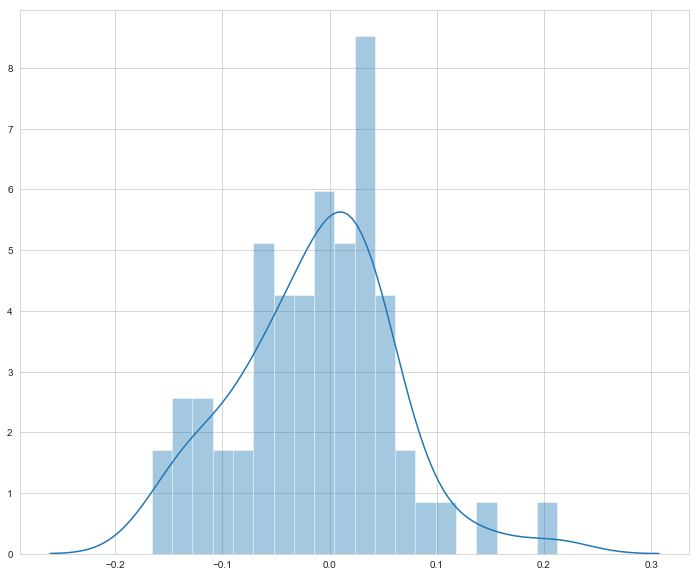

In [62]:
#Plotting the error terms
plt.figure(figsize=(12,10))
sns.distplot(y_test_rfe-y_test_predict,bins=20,)

We can see that the error term is normally distributed around zero, which means our model has done good predictions.

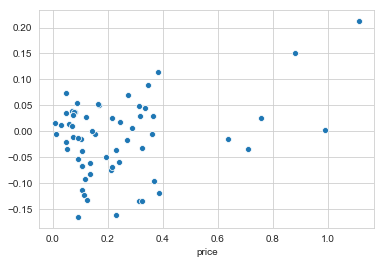

In [63]:
sns.scatterplot(y_test_rfe,y_test_rfe-y_test_predict)

Our error term are also randomly distributed on the test set which means that our model has done well on the unseen data.

### Checking the significance of our Independent variables

horsepower           0.770837
Company_buick        0.291615
wheelbase            0.282365
Company_porsche      0.267889
Company_bmw          0.223617
carbody_hatchback   -0.040281
carbody_wagon       -0.043424
enginetype_dohcv    -0.311802
dtype: float64


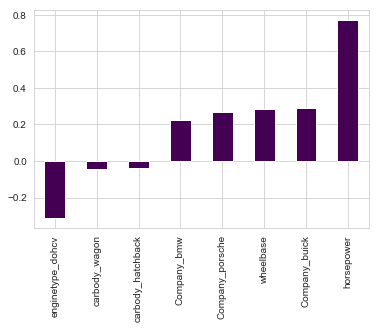

In [64]:
coefs = lr6.params[1:].sort_values()
plt.subplot(1,1,1)
coefs.plot(kind="bar",cmap='viridis')
print (coefs.sort_values(ascending = False))

Horsepower affects our target variable the most while enginetype_dohcv has the most negative effect on our target variable. Below is the equation of the best fit line identified thorugh our analysis.

In [67]:
#Equation of the Best fit line
print("Equation of the Best-fit line: \n")
for index,value in lr7.params.items():
    if(index=='const'):
        print('Price = ({0}'.format(round(value,2)),end =") + ")
    elif(index=='Company_porsche'):
        print('({0} * '.format(round(value,2))+index+")")
    else:
        print('({0} * '.format(round(value,2))+index,end =") + ")

Equation of the Best-fit line: 

Price = (-0.12) + (0.29 * wheelbase) + (0.28 * cylindernumber) + (0.63 * horsepower) + (-0.03 * carbody_hatchback) + (-0.33 * enginetype_dohcv) + (0.13 * enginetype_rotor) + (0.22 * Company_bmw) + (0.26 * Company_buick) + (0.3 * Company_porsche)


In [68]:
# sm.qqplot_2samples(y_test_rfe,y_train)

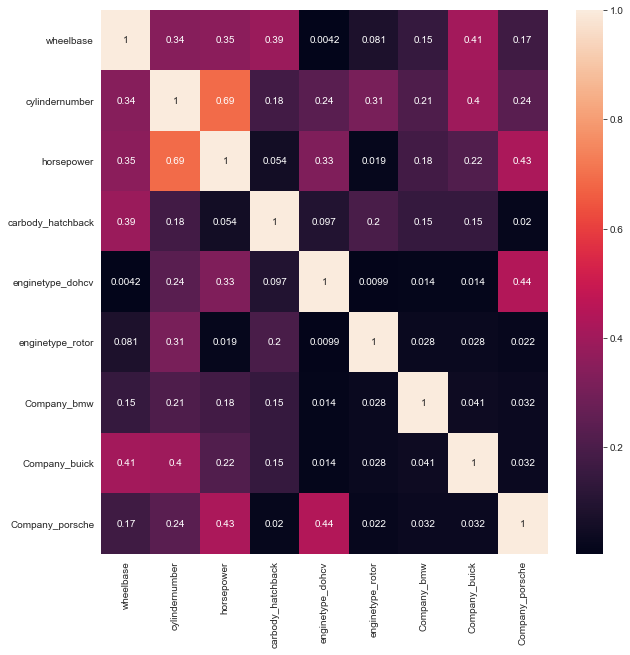

In [74]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(carprice[varlist].corr()),annot=True)

In [107]:
R2Score=pd.DataFrame(columns=['Iteration','R2score'])
for i in range(0,1000):
    X_train,X_test=train_test_split(carprice, test_size=0.3)
#     X_train[mm_scaler_list]=scaler.fit_transform(X_train[mm_scaler_list])
#     y_train=X_train.pop('price')
#     X_train=X_train
    X_test_rfe=X_test.copy()
    X_test_rfe[mm_scaler_list]=scaler.transform(X_test_rfe[mm_scaler_list])
    y_test_rfe=X_test_rfe.pop('price')
    X_test_rfe=X_test_rfe[varlist]
    
    X_test_rfe=sm.add_constant(X_test_rfe)

    y_test_predict=lr7.predict(X_test_rfe)
    
    r2=metrics.r2_score(y_test_rfe,y_test_predict)
    R2Score.loc[i]=[i]+[r2]

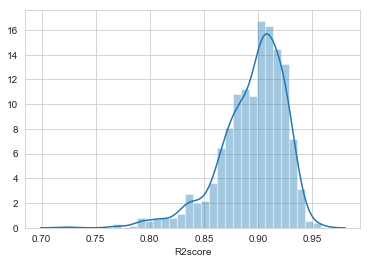

In [108]:
sns.distplot(R2Score['R2score'])

In [109]:
R2Score['R2score'].mean()

0.8949630221739509

In [111]:
import sklearn
scores=cross_val_score(lm,X_train,y_train, scoring='r2',cv=5)

NameError: name 'cross_val_score' is not defined